# Connect to Google Drive and Install dependencies

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 7.9 MB/s eta 0:00:00


# Download dataset on Kaggle.

You have to create your Kaggle API key: account -> settings -> create API key -> upload your kaggle.json file here.

In [3]:
from google.colab import files

# Upload the Kaggle API key
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d quandang/vietnamese-foods
!unzip -q vietnamese-foods.zip -d vietnamese-foods

rm: cannot remove '/root/.kaggle': No such file or directory
100% 4.16G/4.17G [01:11<00:00, 65.4MB/s]
100% 4.17G/4.17G [01:11<00:00, 62.8MB/s]


# Rename dataset folders to match requirements of YOLOv8 model
# Import necessary libs and check GPU

In [5]:
%mv /content/vietnamese-foods/Images/Train/ /content/vietnamese-foods/Images/train/
%mv /content/vietnamese-foods/Images/Validate/ /content/vietnamese-foods/Images/val/
%mv /content/vietnamese-foods/Images/Test/ /content/vietnamese-foods/Images/test/

In [6]:
from ultralytics import YOLO
import cv2
import os
import torch
import tensorflow as tf
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image, clear_output

In [7]:
print("torch.cuda.is_available():", torch.cuda.is_available())
print("torch.cuda.device_count():", torch.cuda.device_count())

torch.cuda.is_available(): True
torch.cuda.device_count(): 1


# Add model weights

For the first time training, leveraging the existing weights on YOLOv8 docs. The next time will be added your own weights on Google Drive

In [8]:
model = None
prev_train = ''
if not os.path.exists('/content/drive/MyDrive/VietNamese-Food/runs/classify/train'):
  model = YOLO("yolov8x-cls.pt")
else:
  prev_train = len(os.listdir('/content/drive/MyDrive/VietNamese-Food/runs/classify/'))
  model = YOLO(f'/content/drive/MyDrive/VietNamese-Food/runs/classify/train{prev_train}/weights/best.pt')

print(prev_train)

5

# Training

In [ ]:
project = '/content/drive/MyDrive/VietNamese-Food/runs/classify' # saving logs directory

results = model.train(data='/content/vietnamese-foods/Images/',
                      epochs=10,
                      patience=5,
                      batch=16,
                      save=True,
                      dropout=0.7,
                      degrees=40,
                      translate=0.3,
                      shear=0.2,
                      perspective=0.0001,
                      flipud=0.5,
                      project=project)

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=/content/drive/MyDrive/VietNamese-Food/runs/classify/train4/weights/best.pt, data=/content/vietnamese-foods/Images/, epochs=10, time=None, patience=5, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/VietNamese-Food/runs/classify, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.7, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, 

train: Scanning /content/vietnamese-foods/Images/train... 17581 images, 0 corrupt: 100%|██████████| 17581/17581 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/vietnamese-foods/Images/train/Banh chung/203.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/vietnamese-foods/Images/train/Banh chung/440.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/vietnamese-foods/Images/train/Banh cuon/156.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/vietnamese-foods/Images/train/Banh cuon/297.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/vietnamese-foods/Images/train/Banh duc/424.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/vietnamese-foods/Images/train/Banh gio/147.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/vietnamese-foods/Images/train/Banh gio/57.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/vietnamese-foods/Images/train/Banh mi/100.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/vietnamese-foods/Images/train/Banh xeo/570.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/vietna


val: Scanning /content/vietnamese-foods/Images/val... 2515 images, 0 corrupt: 100%|██████████| 2515/2515 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/vietnamese-foods/Images/val/Banh tet/300.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/vietnamese-foods/Images/val/Banh xeo/467.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/vietnamese-foods/Images/val/Cao lau/261.jpg: corrupt JPEG restored and saved


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/VietNamese-Food/runs/classify/train5
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [01:00<00:00,  1.31it/s]

                   all      0.883      0.978



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:50<00:00,  1.57it/s]

                   all      0.846      0.975



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:50<00:00,  1.55it/s]

                   all      0.839      0.965



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:52<00:00,  1.51it/s]

                   all       0.86      0.976



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:51<00:00,  1.54it/s]

                   all      0.849      0.975



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:51<00:00,  1.55it/s]

                   all      0.863      0.974
Stopping training early as no improvement observed in last 5 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



6 epochs completed in 0.926 hours.
Optimizer stripped from /content/drive/MyDrive/VietNamese-Food/runs/classify/train5/weights/last.pt, 112.6MB
Optimizer stripped from /content/drive/MyDrive/VietNamese-Food/runs/classify/train5/weights/best.pt, 112.6MB

Validating /content/drive/MyDrive/VietNamese-Food/runs/classify/train5/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-cls summary (fused): 133 layers, 56161630 parameters, 0 gradients, 153.8 GFLOPs
train: /content/vietnamese-foods/Images/train... found 17581 images in 30 classes ✅ 
val: /content/vietnamese-foods/Images/val... found 2515 images in 30 classes ✅ 
test: /content/vietnamese-foods/Images/test... found 5040 images in 30 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:51<00:00,  1.54it/s]


                   all      0.883      0.978
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/drive/MyDrive/VietNamese-Food/runs/classify/train5
Results saved to /content/drive/MyDrive/VietNamese-Food/runs/classify/train5


In [ ]:
print(results)

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a111771be80>
curves: []
curves_results: []
fitness: 0.9306163191795349
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8831014037132263, 'metrics/accuracy_top5': 0.9781312346458435, 'fitness': 0.9306163191795349}
save_dir: PosixPath('/content/drive/MyDrive/VietNamese-Food/runs/classify/train5')
speed: {'preprocess': 0.10343858783335144, 'inference': 2.2260364433880118, 'loss': 0.0006426399792164979, 'postprocess': 0.00045522306832831137}
task: 'classify'
top1: 0.8831014037132263
top5: 0.9781312346458435


# Testing performance & visualization

In [ ]:
dataset_path = '/content/vietnamese-foods/Images/test/'
folders = [folder for folder in os.listdir(dataset_path)]

pretrained_model = YOLO(f'/content/drive/MyDrive/VietNamese-Food/runs/classify/train{prev_train + 1}/weights/best.pt')


accuracy = 0
test_num = []

for folder in folders:
  res = pretrained_model.predict(source=os.path.join(dataset_path, folder))
  clear_output()
  test_num.append(len(os.listdir(os.path.join(dataset_path, folder))))
  for r in res:
    classes = r.names
    if classes[r.probs.top1] == folder:
      accuracy += 1

print(f'Accuracy: {round(accuracy * 100 / np.sum(test_num), 2)}%')

Accuracy: 88.12%


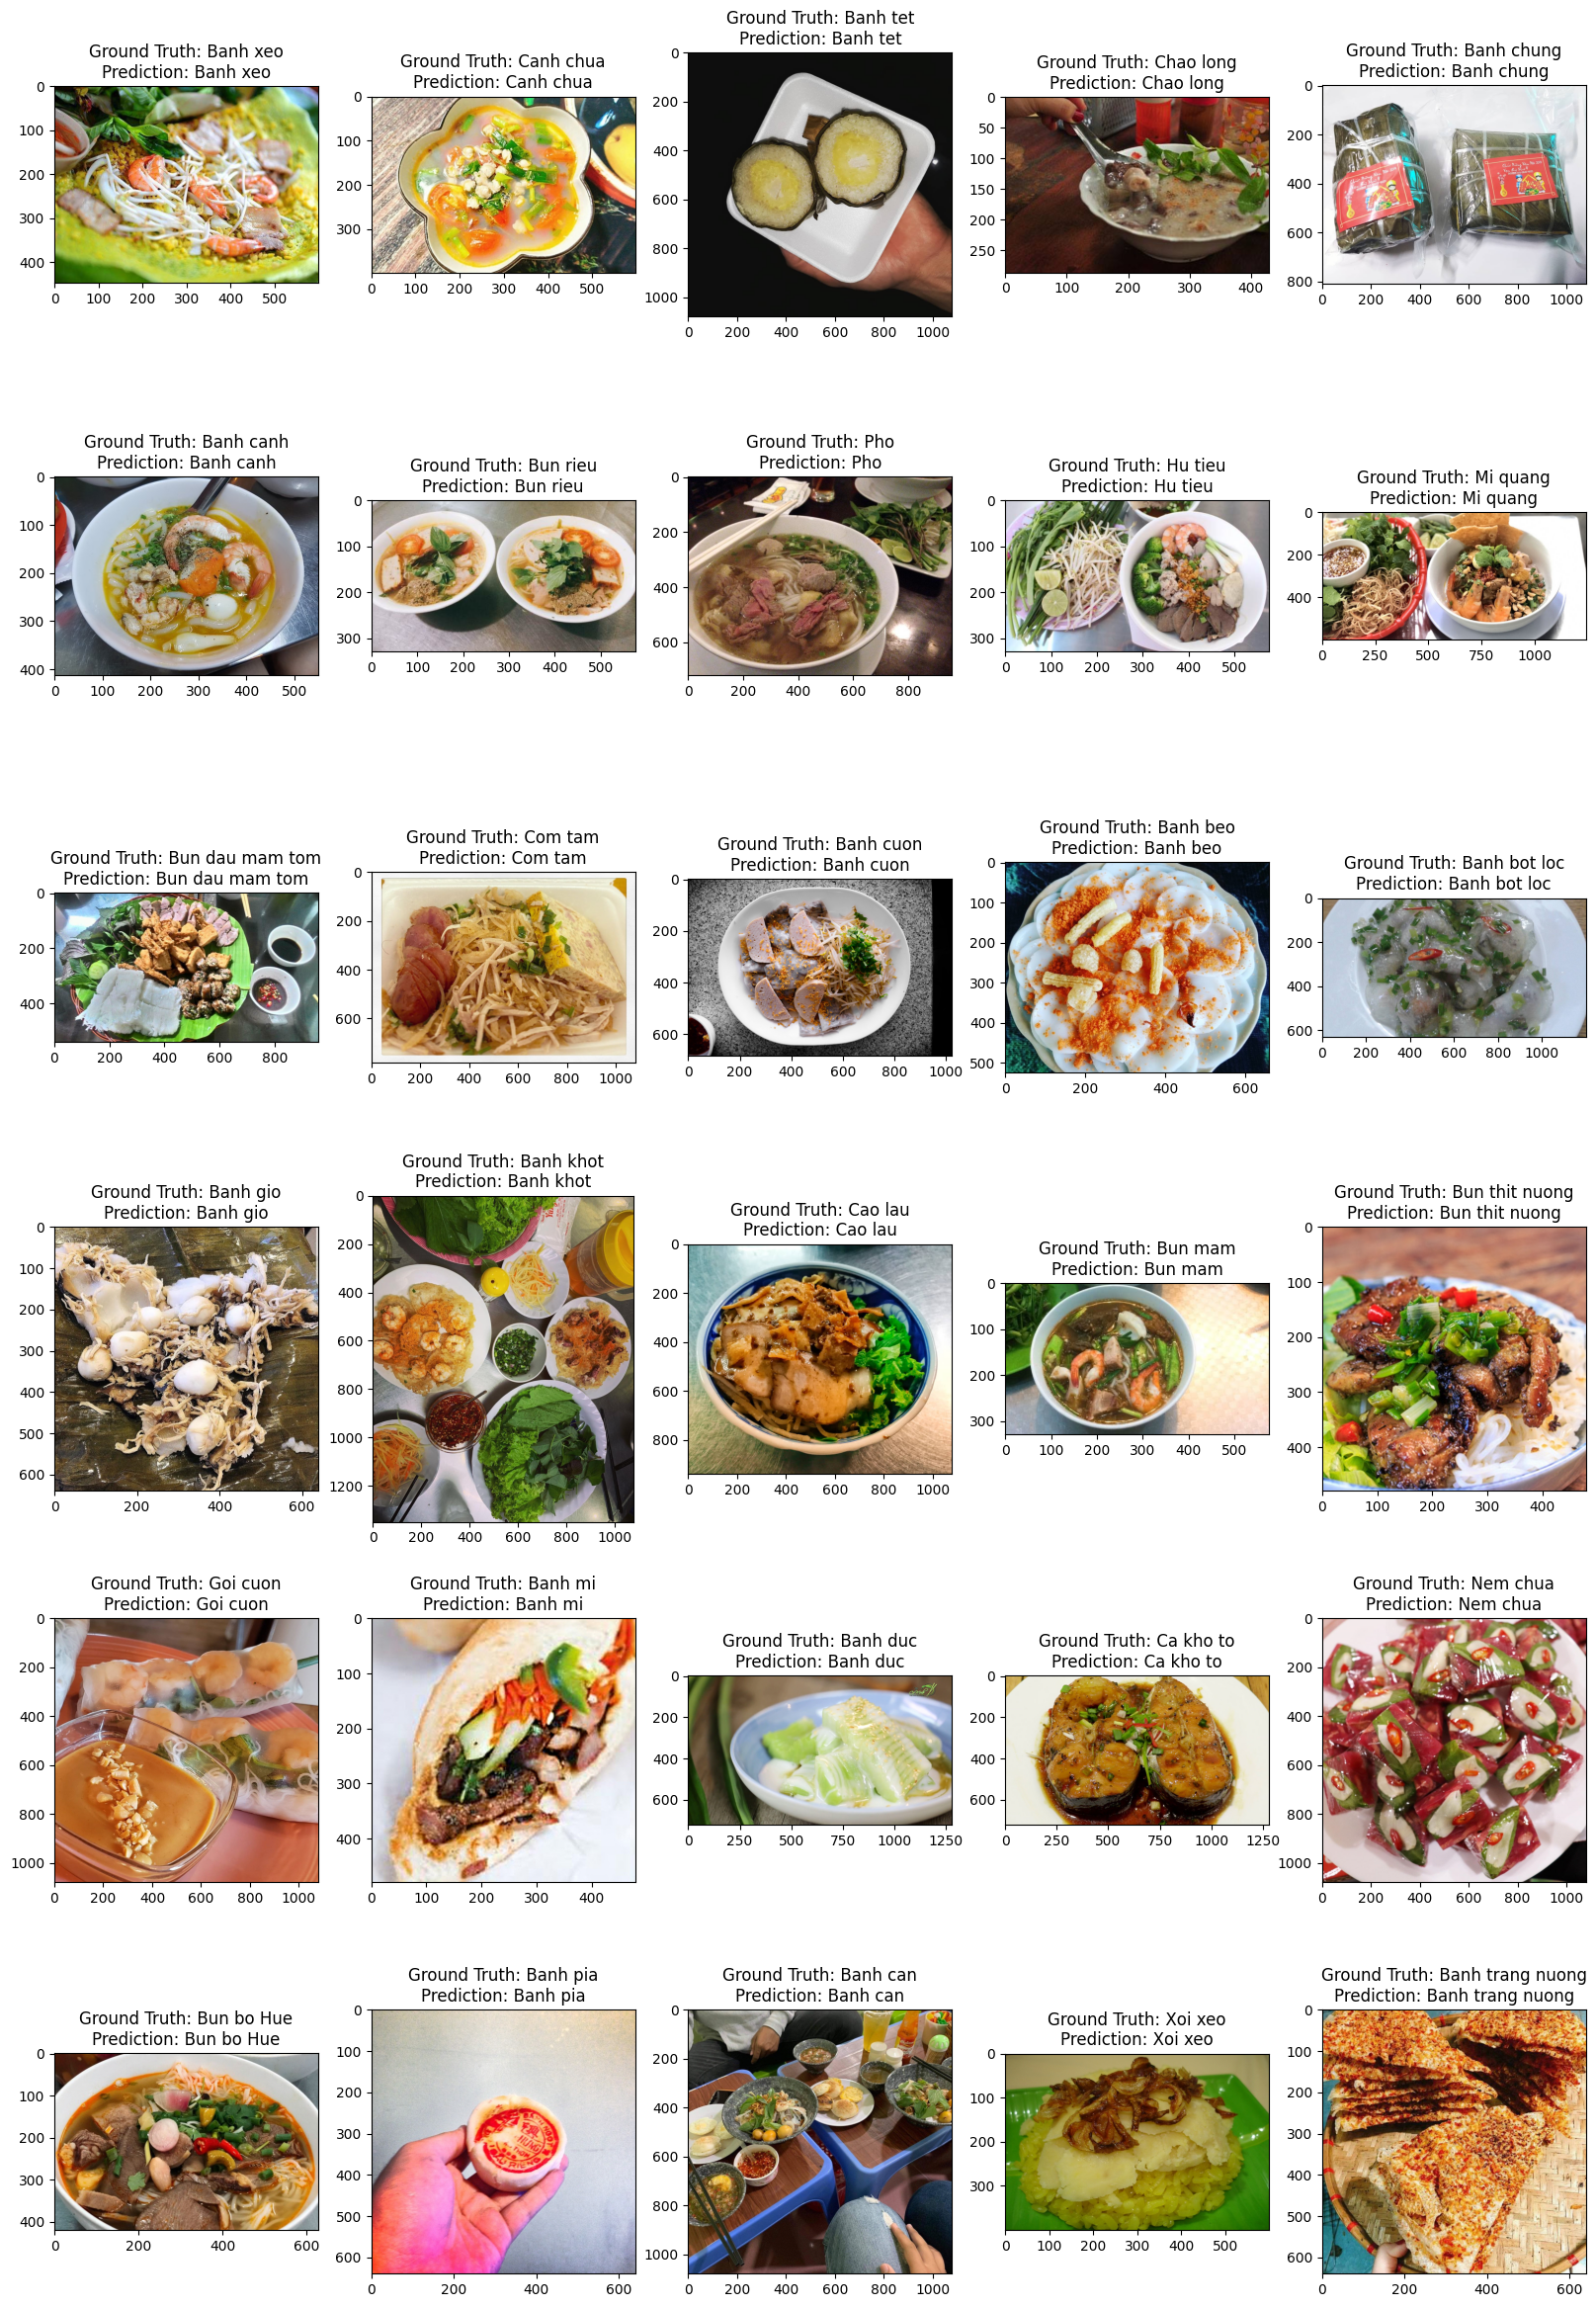

In [50]:
import matplotlib.image as mpimg

dataset_path = '/content/vietnamese-foods/Images/test/'
folders = [folder for folder in os.listdir(dataset_path)]

pretrained_model = YOLO(f'/content/drive/MyDrive/VietNamese-Food/runs/classify/train{prev_train}/weights/best.pt')

test_img = []
for folder in folders:
  img = np.random.choice(os.listdir(os.path.join(dataset_path, folder)))
  test_img.append(os.path.join(dataset_path, folder, img))

prediction = pretrained_model(test_img[0])
prediction[0].names[prediction[0].probs.top1]

figure, axes = plt.subplots(6, 5, figsize=(20, 30))

for i, folder in enumerate(folders):
  img_path = os.path.join(dataset_path, folder, np.random.choice(os.listdir(os.path.join(dataset_path, folder))))
  prediction = pretrained_model(img_path)
  label = prediction[0].names[prediction[0].probs.top1]
  true_label = folder
  axes[i // 5, i % 5].imshow(mpimg.imread(img_path))
  axes[i // 5, i % 5].set_title(f'Ground Truth: {true_label}\nPrediction: {label}')

clear_output()
plt.show()

In [14]:
# Accuracy: 88.12% - train 5 (about 30 epochs)


image 1/1 /content/pho100do.jpg: 224x224 Pho 0.98, Bun bo Hue 0.01, Banh canh 0.00, Chao long 0.00, Hu tieu 0.00, 14.3ms
Speed: 22.1ms preprocess, 14.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


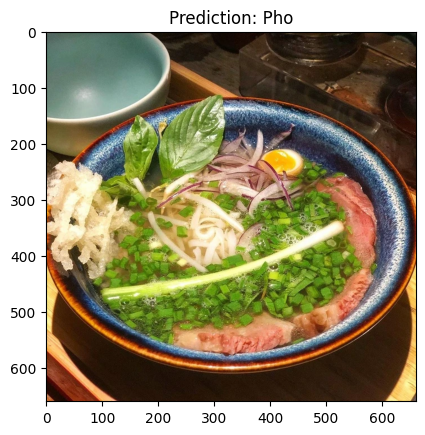

In [55]:
img_path = '/content/pho100do.jpg'
your_test = pretrained_model(img_path)

plt.imshow(mpimg.imread(your_test[0].path))
plt.title(f'Prediction: {your_test[0].names[your_test[0].probs.top1]}')
plt.show()